<a href="https://colab.research.google.com/github/pndang/Project_WHEL/blob/main/predictive_analysis_iris_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Phu Dang

Date: 02.14.2023

Mentor: Professor Niema Moshiri, Niema Lab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# iris['data']

In [ ]:
iris = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target']
)

In [ ]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

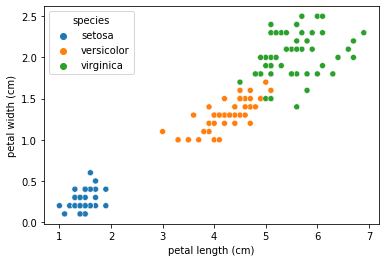

In [ ]:
sns.scatterplot(data=iris, x='petal length (cm)', y='petal width (cm)', hue='species')

In [ ]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [ ]:
X = iris.drop(['target', 'species'], axis=1)

# Converting data into numpy arrays
X = X.to_numpy()[:, (0, 1, 2, 3)]
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5, 
                                                    random_state=42)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
clf.predict([[5, 2.1, 4, 1.4]])

array([2.])

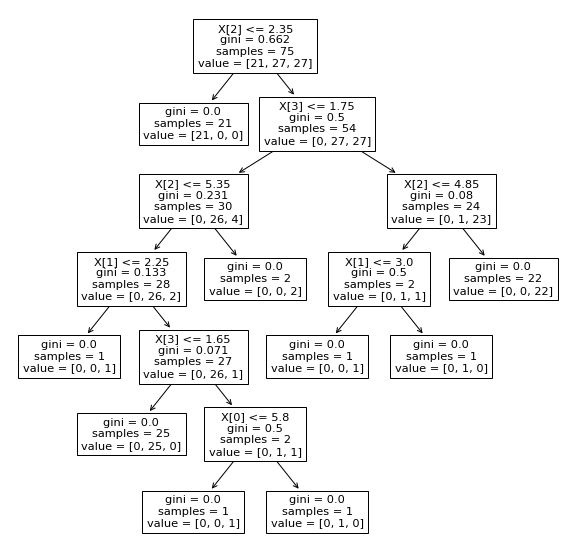

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf);

In [ ]:
# Getting model accuracy

results = []

for array in X_test:
  prediction = clf.predict([array])
  results.append(prediction[0])


In [ ]:
y_test.index

Int64Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
              9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
            108, 143,  45,  30,  22,  15,  65,  11,  42, 146,  51,  27,   4,
             32, 142,  85,  86,  16,  10,  81, 133, 137,  75, 109,  96, 105,
             66,   0, 122,  67,  28,  40,  44,  60, 123,  24,  25,  23,  94,
             39,  95, 117,  47,  97, 113,  33, 138, 101,  62],
           dtype='int64')

In [ ]:
correct_count = 0
idx = 0
for i in y_test.index:
  if results[idx] == y_test[i]:
    correct_count += 1
  idx += 1

accuracy = correct_count / len(y_test)

In [ ]:
accuracy

0.9466666666666667

In [ ]:
confusion = confusion_matrix(y_test, results)

print('Confusion Matrix\n')
print(confusion)

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, results)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, results, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, results, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, results, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, results, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, results, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, results, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, results, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, results, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, results, average='weighted')))

print('\nClassification Report\n')
print(classification_report(y_test, results, target_names=['setosa', 'versicolor', 'virginica']))

Confusion Matrix

[[29  0  0]
 [ 0 20  3]
 [ 0  1 22]]

Accuracy: 0.95

Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

Macro Precision: 0.94
Macro Recall: 0.94
Macro F1-score: 0.94

Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.95

Classification Report

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.95      0.87      0.91        23
   virginica       0.88      0.96      0.92        23

    accuracy                           0.95        75
   macro avg       0.94      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75

